In [86]:
 #Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [87]:
df = pd.read_csv('clients.csv')
print(df.shape)

(195, 25)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [89]:
df = df.dropna()
print(df.shape)


(164, 25)


In [90]:
df.head()


,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [91]:
df['Y'] = df.Y.astype('int64')
#df['Price'] = df.Price.astype('int64')
#df['User_Count'] = df.User_Count.astype('int64')
#df['Critic_Count'] = df.Critic_Count.astype('int64')

In [92]:
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Price']

0      246172.68
1      246331.90
2      209280.91
3      452667.01
4      467083.31
         ...    
172    219865.76
173    204292.49
175    222867.42
176    291494.36
177    296483.14
Name: Price, Length: 164, dtype: float64

In [93]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,1986,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,1983,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,1985,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,1985,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,1979,5.0,15.0,F,USA,California,Home,4,No,Agency


In [94]:
useful_cols = ['Type of property', 'Year of sale', 'Month of sale', 'Area (ft.)', 'Price', 
               'Age at time of purchase', 'Gender', 'Country',
               'Purpose', 'Mortgage', 'Source'
              ]
df[useful_cols].head(10)

,Type of property,Year of sale,Month of sale,Area (ft.),Price,Age at time of purchase,Gender,Country,Purpose,Mortgage,Source
0,Apartment,2005,11,743.09,246172.68,19.0,F,USA,Home,No,Website
1,Apartment,2005,10,756.21,246331.90,22.0,F,USA,Home,No,Website
2,Apartment,2007,7,587.28,209280.91,22.0,M,USA,Home,Yes,Client
3,Apartment,2007,12,1604.75,452667.01,22.0,M,USA,Investment,Yes,Website
4,Apartment,2004,11,1375.45,467083.31,25.0,F,USA,Home,No,Agency
5,Apartment,2007,9,675.19,203491.85,26.0,F,USA,Investment,No,Client
6,Apartment,2007,9,670.89,212520.83,26.0,F,USA,Investment,No,Agency
7,Apartment,2008,1,720.81,198591.85,26.0,M,USA,Home,No,Client
8,Apartment,2006,6,782.25,265467.68,27.0,M,USA,Home,Yes,Website
9,Apartment,2006,3,794.52,235633.26,27.0,F,USA,Investment,Yes,Agency


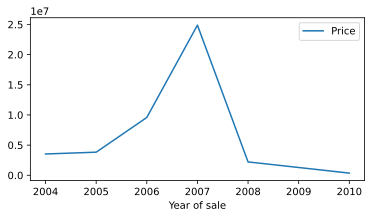

In [95]:
df1.plot();


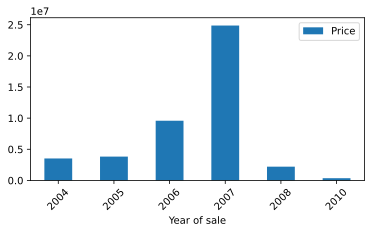

In [96]:
df1.plot(kind='bar', rot=45);

In [97]:
df.dropna()


,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,1986,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,1983,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,1985,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,1985,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,1979,5.0,15.0,F,USA,California,Home,4,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3008,3,2007,6,Apartment,8,697.89,219865.76,Sold,C0103,...,1936,8.0,13.0,M,USA,Oregon,Investment,2,No,Website
173,3040,3,2007,6,Apartment,40,670.89,204292.49,Sold,C0103,...,1936,8.0,13.0,M,USA,Oregon,Investment,2,No,Website
175,3009,3,2006,5,Apartment,9,743.41,222867.42,Sold,C0148,...,1933,5.0,5.0,F,USA,California,Investment,5,Yes,Agency
176,3052,3,2006,3,Apartment,52,923.21,291494.36,Sold,C0172,...,1933,6.0,8.0,M,USA,California,Home,4,Yes,Agency


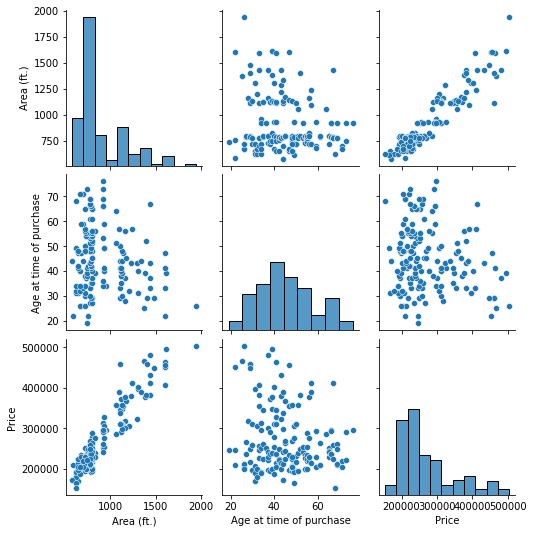

In [98]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['Area (ft.)', 'Age at time of purchase', 'Price']]);
sns_plot.savefig('pairplot.png')


In [99]:
df10 = df.replace({'USA ': 'USA'}, regex=True).astype(float)
df10

ValueError: could not convert string to float: 'Apartment'

In [101]:
top_developers_df = df.groupby('Gender')[['Price']].sum()\
    .sort_values('Gender', ascending=False).head(10)
    
top_developers_df

,Price
Gender,
M,27042246.22
F,17345023.59


In [102]:
top_developers_df.style.bar()


,Price
Gender,
M,27042246.220000
F,17345023.590000


In [109]:
top_developers_df = df.groupby('Age Interval')[['Price']].sum()\
    .sort_values('Age Interval', ascending=False)
top_developers_df.style.bar()

KeyError: 'Age Interval'